## A notebook to visualise the underlying data, given a matrix of similarities

This notebook relies on you having the following files:
    * Multi30K and COCO captions
    * Multi30K and COCO raw images
    * Multi30K and COCO image alignment files

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Load the similarity data
sim = np.load(open("similarities.npy", 'rb'))

In [3]:
# Load the Multi30K sentences and image references
m30k_caps = open('train.en').readlines()
m30k_impath = "dataset/flickr30k-images"
m30k_images = open("dataset/data/task1/image_splits/train.txt").readlines()
m30k_images = [x.replace("\n", "") for x in m30k_images]

In [4]:
# Load the COCO sentences and image references
coco_caps = open('val_captions.txt').readlines()
coco_impath = 'dataset/val2014'
coco_imdata = open("val_ids2files.txt").readlines()  # id:filename
coco_images = dict()
for x in coco_imdata:
    img_id = x.split(":")[0]
    filename = x.split(":")[1]
    coco_images[img_id] = filename.replace("\n","")

In [5]:
def show_most_similar_caption(d1, d2, idx=None, n=5):
    if idx is None:
        # When idx==None we will randomly select an image
        idx = np.random.randint(0, len(d1))
    f, (ax1, ax2) = plt.subplots(1, 2)  # Draw the images side-by-side
    most_similar = np.argmax(sim[idx])
    coco = d2[n * most_similar: n * most_similar + n][0]
    print('M30K: {}'.format(d1[idx]))
    print('COCO: {}'.format(coco.split("\t")[0]))
    ax1.imshow(mpimg.imread('{}/{}'.format(m30k_impath, m30k_images[idx])))
    ax1.set_title("Multi30K")
    ax2.imshow(mpimg.imread('{}/{}'.format(coco_impath, coco_images[coco.split("\t")[1].replace("\n","")])))
    ax2.set_title("COCO")

## Visualise a random data point

M30K: Firefighters attempt to put out a wildfire in New Mexico.

COCO: a close up of a person cutting a pizza with scissors


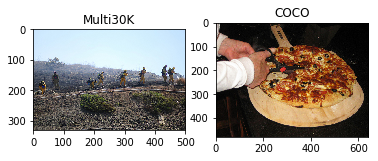

In [6]:
show_most_similar_caption(m30k_caps, coco_caps)

## Restrict the visualisation to only the most similar points

In [7]:
def threshold_similarity_data(sim, threshold=0.1):
    max_idx = np.argmax(sim, axis=1)
    max_values = np.array([sim[x, max_idx[x]] for x in range(max_idx.shape[0])])
    plt.hist(max_values)
    plt.title("Histogram of similarity values")
    exceeds = np.where(max_values > threshold)
    return exceeds[0]

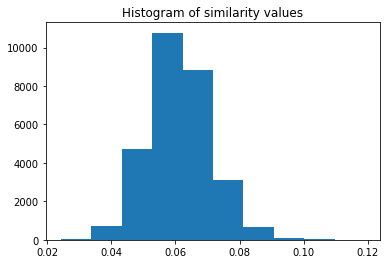

In [8]:
top = threshold_similarity_data(sim, threshold=0.1)

M30K: Two people are eating a meal together.

COCO: Three pieces of battered fish and chips with lemon and ketchup.


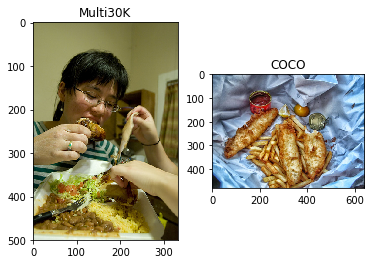

In [9]:
show_most_similar_caption(m30k_caps, coco_caps, idx=top[0])